In [109]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#data
train = pd.read_csv("C:/Users/LG/Downloads/loan_train.csv")
test = pd.read_csv("C:/Users/LG/Downloads/loan_test.csv")

In [63]:
# train 데이터 확인 
train

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [64]:
#null 값 확인 
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [65]:
train = train.dropna()

In [66]:
#변환한 train 데이터 확인 
train

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


<AxesSubplot:>

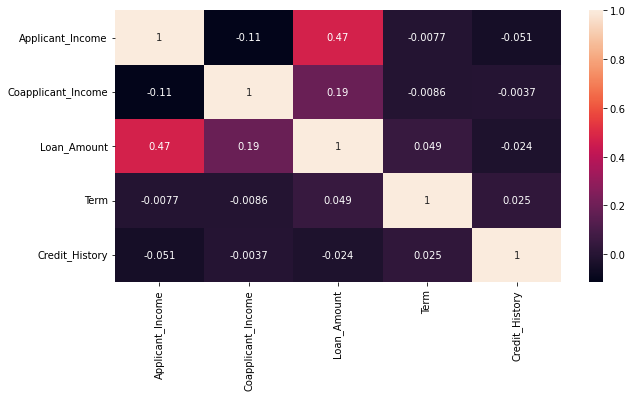

In [67]:
#corr
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot = True)

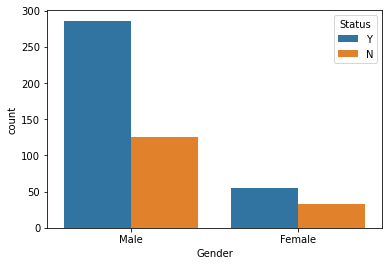

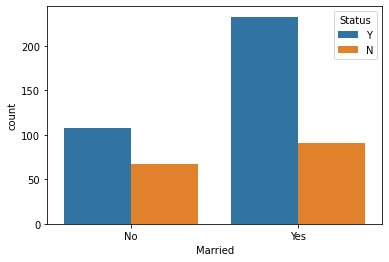

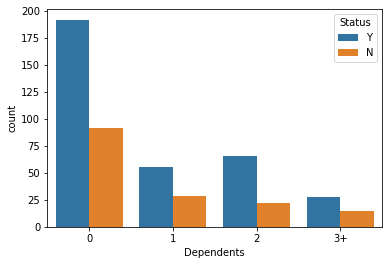

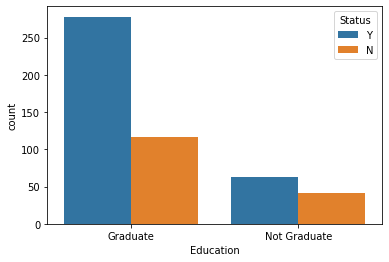

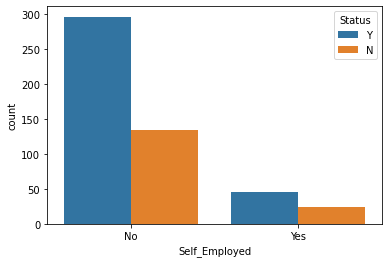

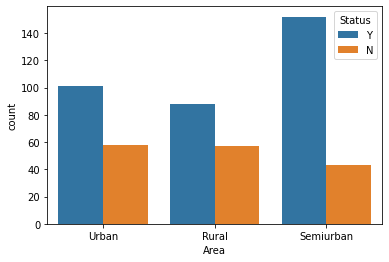

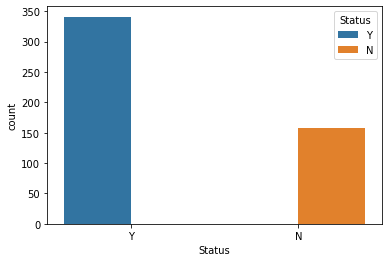

In [90]:
numberic = []
for i in train.columns:
    if train[i].dtypes == 'O':
       sns.countplot(data=train,x=i,hue='Status')
       plt.show()
    else: numberic.append(i)

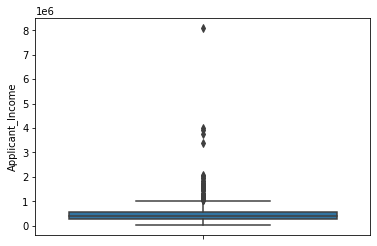

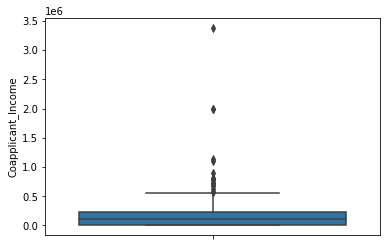

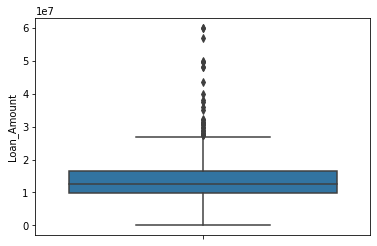

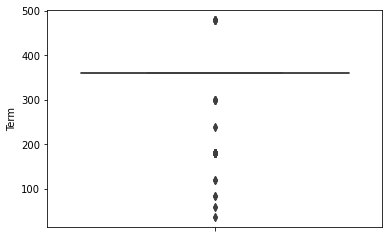

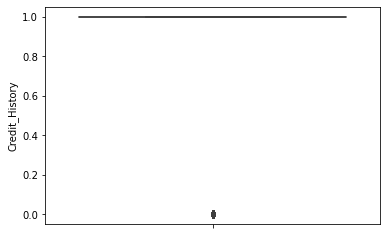

In [141]:
for i in train.columns:
    if train[i].dtypes != 'O':
        sns.boxplot(y=train[i])
        plt.show()

In [70]:
#범주형 0 , 1 형태로 변환 , 연속형 따로 저장 
cate=pd.DataFrame()
num=pd.DataFrame()
for i in train.columns:
    if train[i].dtypes == 'O':
        cate[i] =  LabelEncoder().fit_transform(train[i])
    else:
        num[i] = train[i]

In [112]:
#minmaxscaler
scaler = MinMaxScaler()
scaler.fit(num)
num_tr = scaler.transform(num)

In [114]:
num_data

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
0,0.070489,0.000000,0.250000,0.729730,1.0
1,0.054830,0.044567,0.213333,0.729730,1.0
2,0.035250,0.000000,0.110000,0.729730,1.0
3,0.030093,0.069687,0.200000,0.729730,1.0
4,0.072356,0.000000,0.235000,0.729730,1.0
...,...,...,...,...,...
494,0.034014,0.000000,0.118333,0.729730,1.0
495,0.048930,0.000000,0.066667,0.324324,1.0
496,0.097984,0.007093,0.421667,0.729730,1.0
497,0.091936,0.000000,0.311667,0.729730,1.0


In [81]:
num_data= pd.DataFrame(data=num_tr, columns=num.columns)

In [82]:
train_1 = pd.concat([cate, num_data], axis = 1)

In [83]:
train_1 #변환된 데이터 확인 

,Gender,Married,Dependents,Education,Self_Employed,Area,Status,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
0,1,0,0,0,0,2,1,0.070489,0.000000,0.250000,0.729730,1.0
1,1,1,1,0,0,0,0,0.054830,0.044567,0.213333,0.729730,1.0
2,1,1,0,0,1,2,1,0.035250,0.000000,0.110000,0.729730,1.0
3,1,1,0,1,0,2,1,0.030093,0.069687,0.200000,0.729730,1.0
4,1,0,0,0,0,2,1,0.072356,0.000000,0.235000,0.729730,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,1,0.034014,0.000000,0.118333,0.729730,1.0
495,1,1,3,0,0,0,1,0.048930,0.000000,0.066667,0.324324,1.0
496,1,1,1,0,0,2,1,0.097984,0.007093,0.421667,0.729730,1.0
497,1,1,2,0,0,2,1,0.091936,0.000000,0.311667,0.729730,1.0


In [85]:
#데이터 분류
X = train_1.drop('Status', axis = 1)
Y = train_1['Status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)

In [101]:
#logsit 적합 
logist = LogisticRegression()
logist.fit(X_train, y_train)
y_pred = logist.predict(X_test)
accuracy_score(y_pred,y_test)

0.78

In [102]:
#rf
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.76

In [103]:
#xgb
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_pred,y_test)

0.75

In [111]:
# LGBM 
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred=lgb.predict(X_test)
accuracy_score(y_pred,y_test)

0.73